In [10]:
import wfdb
import numpy as np
import pandas as pd
import glob
import os
from scipy.signal import resample

In [11]:
# Code to load all the signals
basePath="ECG_Database"

## List files and folders insade basePath
patDir = sorted(
    [f.path for f in os.scandir(basePath) if f.is_dir()],
    key=lambda x: int(os.path.basename(x).replace("patient", ""))  # Extraer el número de paciente
)

## Dictionary to store each patient's records
patDict = {}

def generateName(i, extension):
        return f"record{i:03d}{extension}" 

for patient in patDir:
    patID=os.path.basename(patient) # patID = directory name
    archivos = os.listdir(patient)

    # Create 3 lists, one for each file type 
    dat = [f for f in archivos if f.endswith(".dat")]
    hea = [f for f in archivos if f.endswith(".hea")]
    xyz = [f for f in archivos if f.endswith(".xyz")]

    # Rename the files for clarity
    
    import os

    # Agrupar los archivos por nombre base y asignarles un número secuencial
    allFiles = []
    
    # Agrupar los archivos con el mismo nombre base
    for f in dat + hea + xyz: 
        allFiles.append(f)  # Asignar el nuevo nombre

    patDict[patID] = {"files": allFiles}


In [ ]:
for patient, data in patDict.items():
    print(f"Paciente: {patient}")
    
    # Imprimir los archivos del paciente
    if "files" in data:
        print("Archivos:", ", ".join(data["files"]))
    else:
        print("No hay archivos registrados.")
    
    print("-" * 40)

In [ ]:
patient_path = list(patDict.keys())[0]  # Obtener la primera carpeta de paciente
dat_file = os.path.join(patient_path, patDict[patient_path]["files"][0])  # Primer archivo .dat
hea_file = dat_file.replace(".dat", ".hea")  # Archivo .hea correspondiente

print("Ruta del archivo .dat:", dat_file)
print("Ruta del archivo .hea:", hea_file)

In [42]:
import os

# Definir basePath y patient_id
basePath = "ECG_Database"
patient_id = "patient001"  # Ajusta esto si es necesario
patient_path = os.path.join(basePath, patient_id)  # Ruta completa

# Tomar el primer archivo válido en "dat"
dat_files = [f for f in patDict[patient_id]["files"] if not f.endswith(":Zone.Identifier")]

if not dat_files:
    raise FileNotFoundError("No se encontraron archivos .dat válidos para este paciente.")

# Construir la ruta completa del archivo .dat
dat_file = os.path.join(patient_path, dat_files[0])
base_path = os.path.splitext(dat_file)[0]  # Eliminar extensión

# Generar los archivos correspondientes
hea_file = os.path.normpath(base_path + ".hea")
xyz_file = os.path.normpath(base_path + ".xyz")

# Verificar si existen los archivos correctos
if os.path.exists(hea_file) and os.path.exists(dat_file):
    print("✅ Los archivos existen correctamente.")
else:
    print(f"❌ No se encontraron los archivos esperados.\n  - {hea_file}\n  - {dat_file}")

✅ Los archivos existen correctamente.


Archivos en patDict[patient001]: ['s0010_re.dat', 's0016lre.dat', 's0014lre.dat', 's0016lre.hea', 's0014lre.hea', 's0010_re.hea', 's0016lre.xyz', 's0010_re.xyz', 's0014lre.xyz']
📂 Leyendo archivo: ECG_Database/patient001/s0010_re


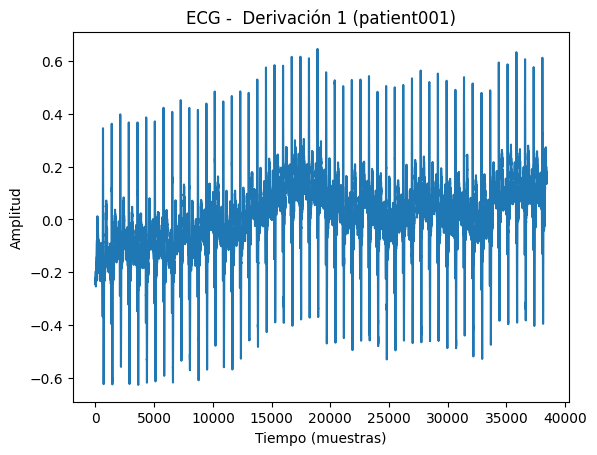

📂 Leyendo archivo: ECG_Database/patient001/s0016lre


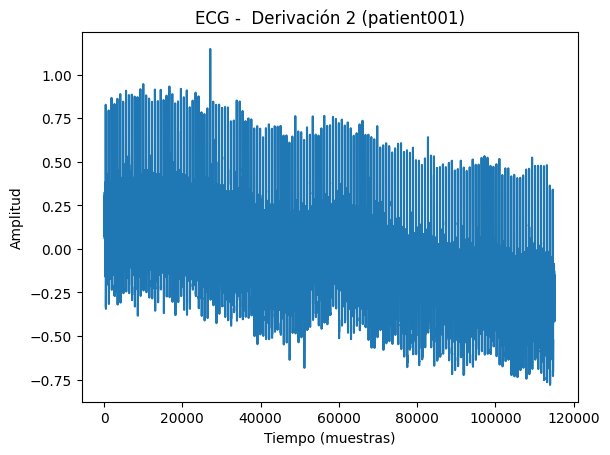

📂 Leyendo archivo: ECG_Database/patient001/s0014lre


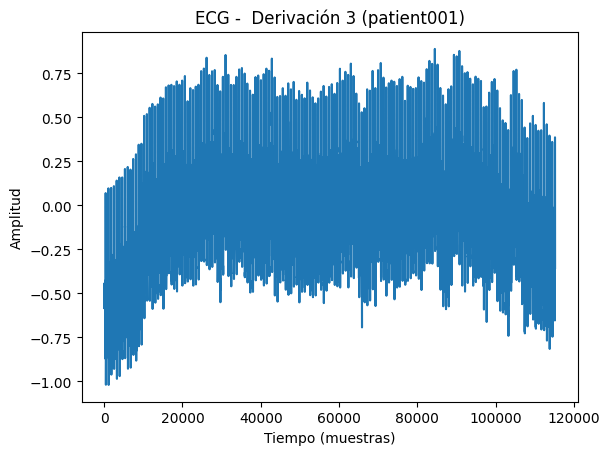

Archivos en patDict[patient002]: ['s0015lre.dat', 's0015lre.hea', 's0015lre.xyz']
📂 Leyendo archivo: ECG_Database/patient002/s0015lre


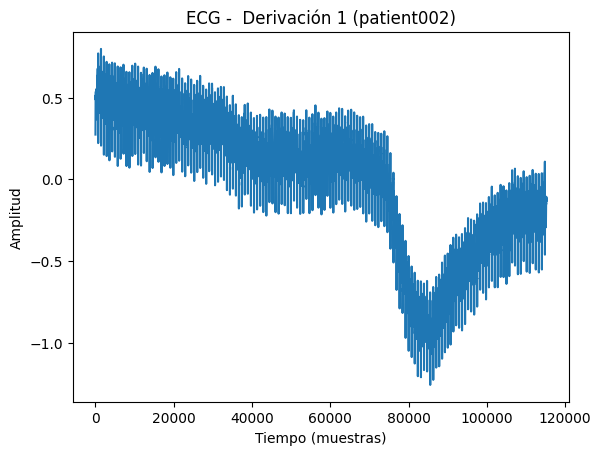

Archivos en patDict[patient003]: ['s0017lre.dat', 's0017lre.hea', 's0017lre.xyz']
📂 Leyendo archivo: ECG_Database/patient003/s0017lre


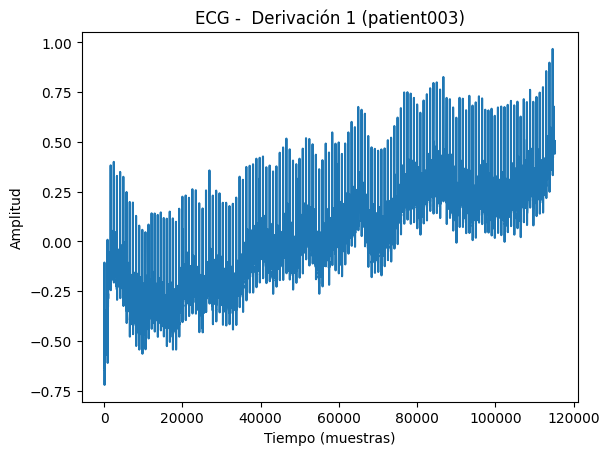

Archivos en patDict[patient004]: ['s0020are.dat', 's0020bre.dat', 's0020bre.hea', 's0020are.hea', 's0020are.xyz', 's0020bre.xyz']
📂 Leyendo archivo: ECG_Database/patient004/s0020are


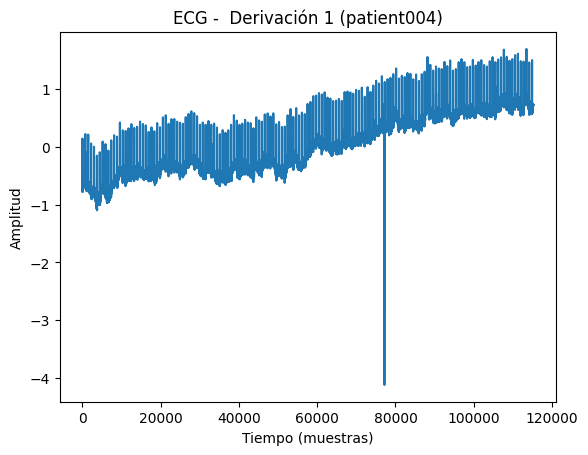

📂 Leyendo archivo: ECG_Database/patient004/s0020bre


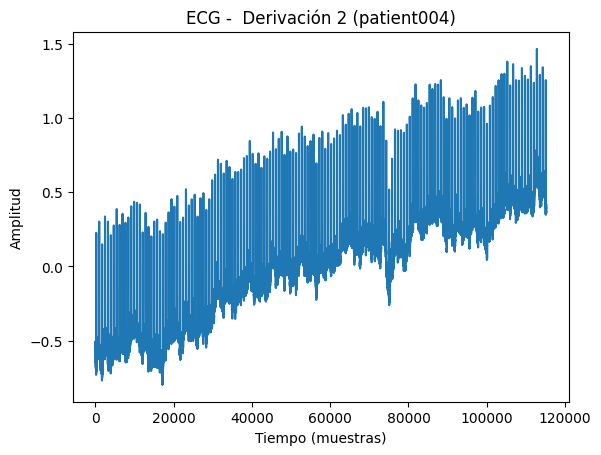

Archivos en patDict[patient005]: ['s0021are.dat', 's0021bre.dat', 's0031lre.dat', 's0101lre.dat', 's0025lre.dat', 's0101lre.hea', 's0025lre.hea', 's0021are.hea', 's0031lre.hea', 's0021bre.hea', 's0031lre.xyz', 's0021bre.xyz', 's0021are.xyz', 's0025lre.xyz', 's0101lre.xyz']
📂 Leyendo archivo: ECG_Database/patient005/s0021are


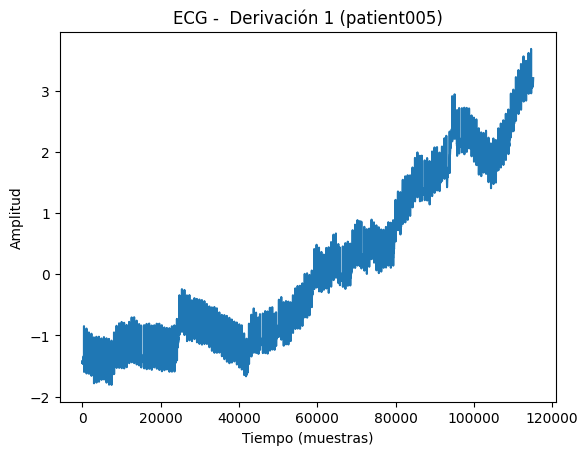

📂 Leyendo archivo: ECG_Database/patient005/s0021bre


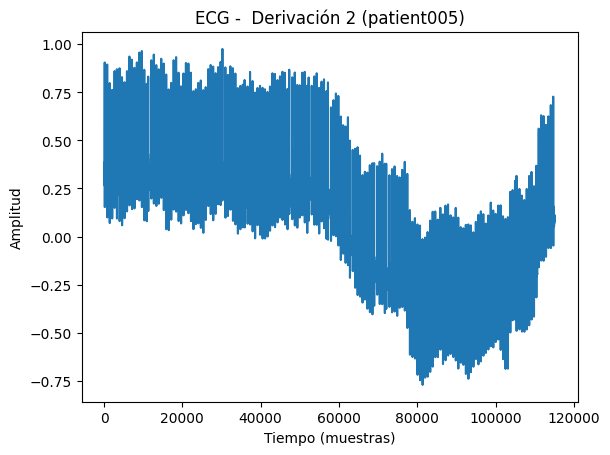

📂 Leyendo archivo: ECG_Database/patient005/s0031lre


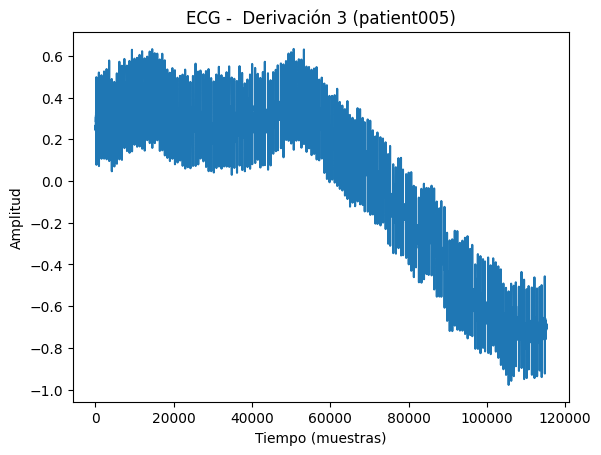

📂 Leyendo archivo: ECG_Database/patient005/s0101lre


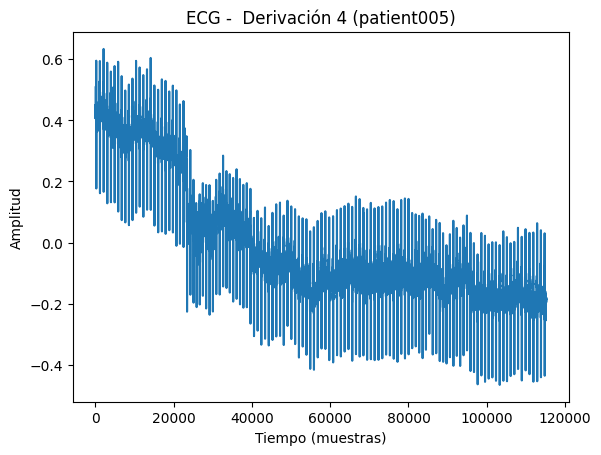

📂 Leyendo archivo: ECG_Database/patient005/s0025lre


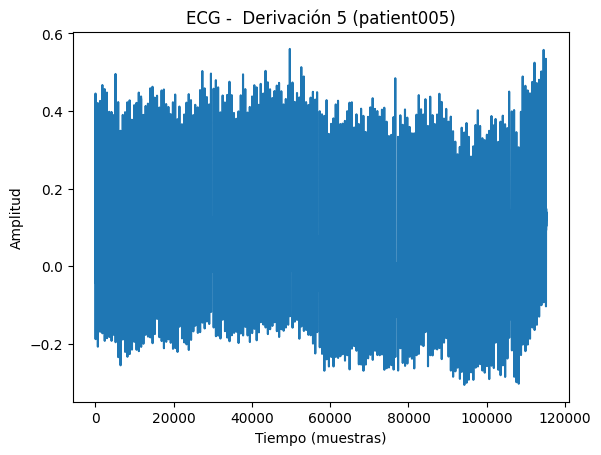

Archivos en patDict[patient006]: ['s0027lre.dat', 's0022lre.dat', 's0064lre.dat', 's0027lre.hea', 's0022lre.hea', 's0064lre.hea', 's0027lre.xyz', 's0064lre.xyz', 's0022lre.xyz']
📂 Leyendo archivo: ECG_Database/patient006/s0027lre


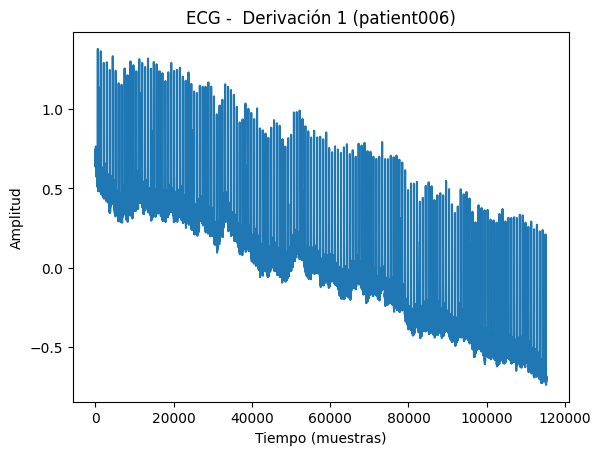

📂 Leyendo archivo: ECG_Database/patient006/s0022lre


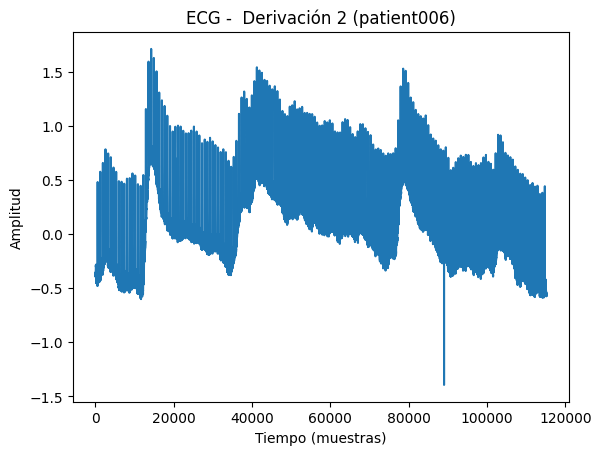

📂 Leyendo archivo: ECG_Database/patient006/s0064lre


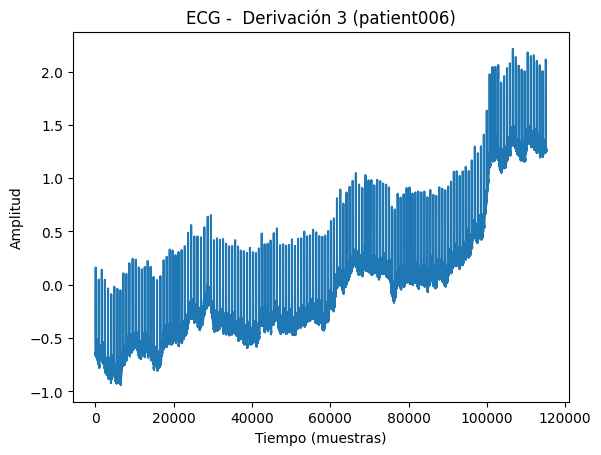

Archivos en patDict[patient007]: ['s0038lre.dat', 's0026lre.dat', 's0078lre.dat', 's0029lre.dat', 's0078lre.hea', 's0038lre.hea', 's0026lre.hea', 's0029lre.hea', 's0026lre.xyz', 's0038lre.xyz', 's0078lre.xyz', 's0029lre.xyz']
📂 Leyendo archivo: ECG_Database/patient007/s0038lre


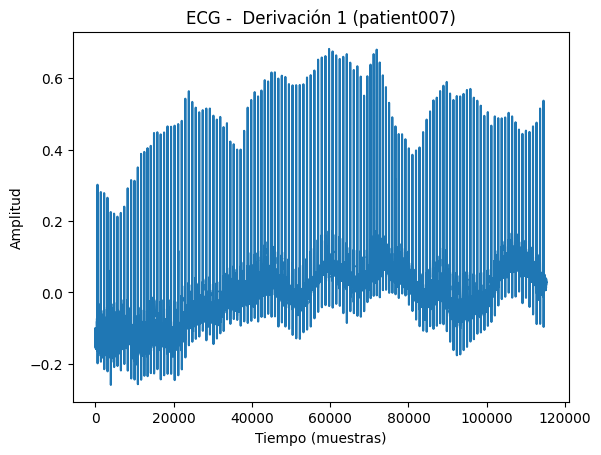

📂 Leyendo archivo: ECG_Database/patient007/s0026lre


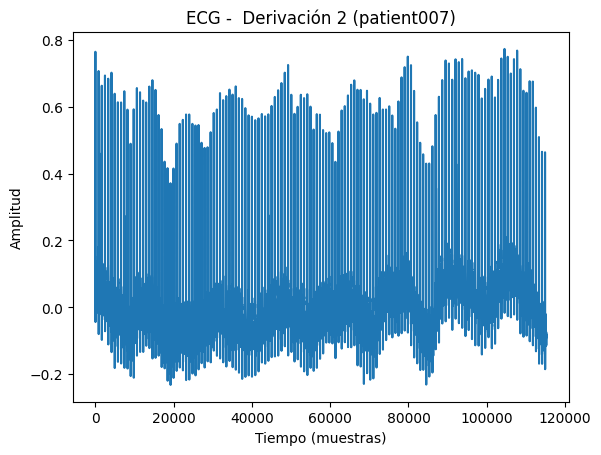

📂 Leyendo archivo: ECG_Database/patient007/s0078lre


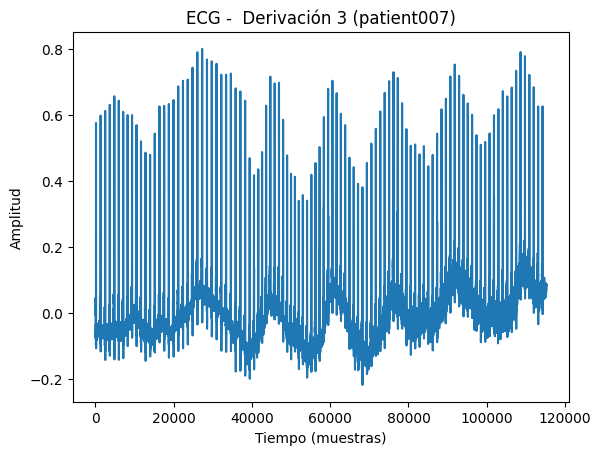

📂 Leyendo archivo: ECG_Database/patient007/s0029lre


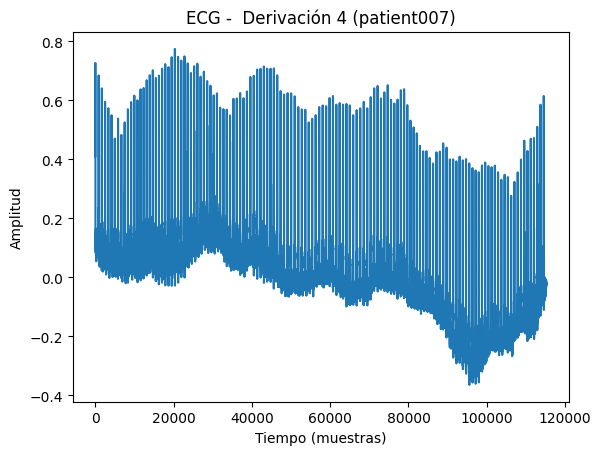

Archivos en patDict[patient008]: ['s0028lre.dat', 's0068lre.dat', 's0037lre.dat', 's0037lre.hea', 's0068lre.hea', 's0028lre.hea', 's0068lre.xyz', 's0028lre.xyz', 's0037lre.xyz']
📂 Leyendo archivo: ECG_Database/patient008/s0028lre


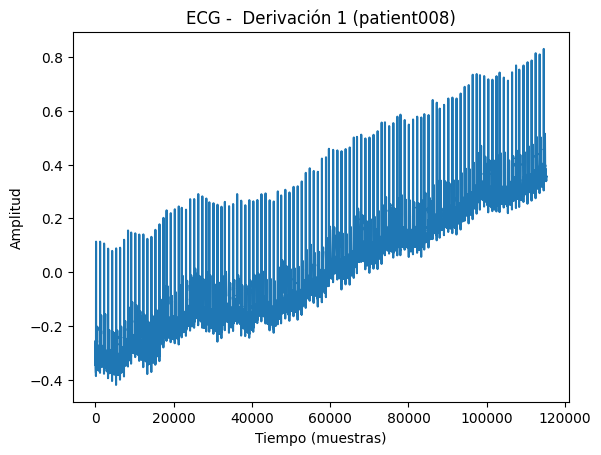

📂 Leyendo archivo: ECG_Database/patient008/s0068lre


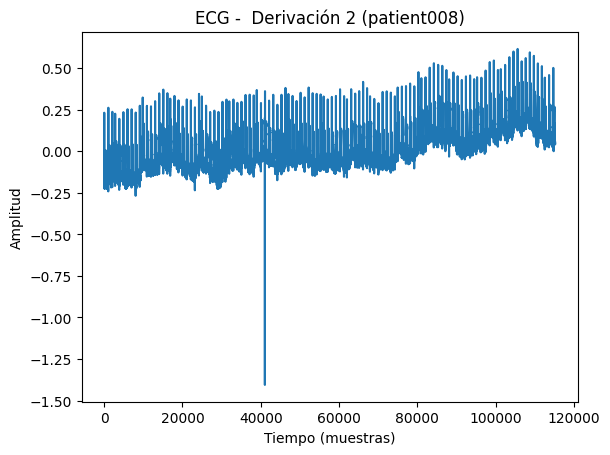

📂 Leyendo archivo: ECG_Database/patient008/s0037lre


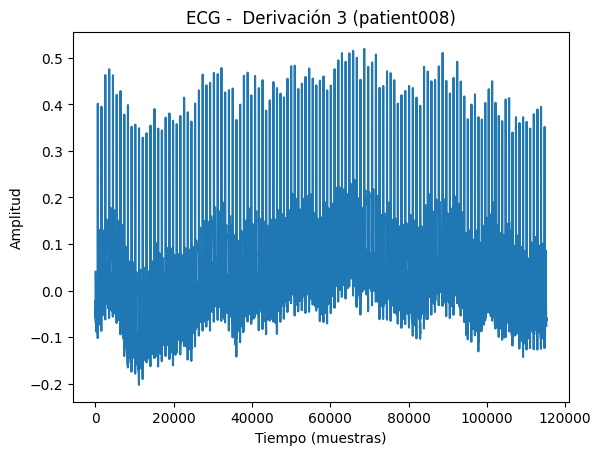

Archivos en patDict[patient009]: ['s0035_re.dat', 's0035_re.hea', 's0035_re.xyz']
📂 Leyendo archivo: ECG_Database/patient009/s0035_re


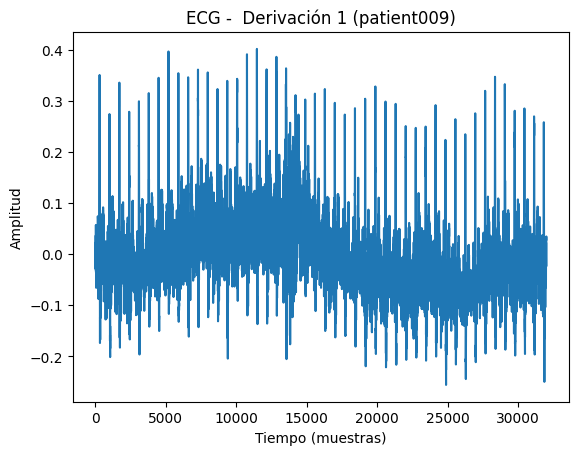

In [16]:
import matplotlib.pyplot as plt
import wfdb
import os


# Seleccionar un paciente y su primer archivo de ECG
basePath = "ECG_Database"
for j in range(1,10):
    number=str(j).zfill(3)
    patient_id = "patient"+number  # Cambia esto si es necesario
    patient_path = os.path.join(basePath, patient_id)  # Ruta completa

    # 📌 Verificar los archivos disponibles en patDict
    print(f"Archivos en patDict[{patient_id}]:", patDict[patient_id]["files"])

    # Filtrar solo archivos que empiecen con "record" y sean .dat
    dat_files = [f for f in patDict[patient_id]["files"] if f.endswith(".dat") ]

    if not dat_files:
        raise FileNotFoundError(f"❌ No se encontraron archivos .dat válidos en {patient_id}")

    # Seleccionar el primer archivo válido
    i=0
    for file in dat_files :
        file_path = os.path.join(patient_path, file)
        file_base = os.path.splitext(file_path)[0]  # Eliminar extensión .dat
        print(f"📂 Leyendo archivo: {file_base}")
        # Leer el archivo de ECG
        record = wfdb.rdrecord(file_base)
        # Extraer la señal
        signal = record.p_signal

        # Graficar la primera derivación (Lead I)
        plt.plot(signal[:, 0])
        plt.title(f"ECG -  Derivación {i+1} ({patient_id})")
        plt.xlabel("Tiempo (muestras)")
        plt.ylabel("Amplitud")
        plt.show()
        i=i+1


# Verificar si los archivos existen antes de leer
if not os.path.exists(file_base + ".dat") or not os.path.exists(file_base + ".hea"):
    raise FileNotFoundError(f"⚠️ Falta algún archivo: {file_base}.dat o {file_base}.hea")



In [ ]:
from scipy.signal import find_peaks

# detect R peaks of the ECG signal
def detectar_picos_r(ecg_signal):
    # Usamos la media de la señal para encontrar los picos
    peaks, _ = find_peaks(ecg_signal, height=np.mean(ecg_signal), distance=150)  # Ajusta el parámetro 'distance' si es necesario
    return peaks

# Función para calcular la frecuencia cardíaca (BPM) y los intervalos RR
def calcular_frecuencia_cardiaca(picos_r, fs=1000):
    # Intervalos RR: la diferencia en el tiempo (en muestras) entre los picos R consecutivos
    rr_intervals = np.diff(picos_r) / fs * 1000  # En milisegundos
    
    # Frecuencia cardíaca promedio en BPM (pulsos por minuto)
    bpm = 60 / (np.mean(rr_intervals) / 1000)  # Promedio de los intervalos RR convertidos a segundos
    
    # Desviación estándar de los intervalos RR (HRV)
    hrv = np.std(rr_intervals)
    
    # Detectar latidos irregulares (valores de RR muy diferentes de la media)
    irregular_beats = rr_intervals[rr_intervals > np.mean(rr_intervals) + 2 * np.std(rr_intervals)]
    
    return bpm, hrv, irregular_beats, rr_intervals

# Función para graficar la señal y los picos R
def graficar_ecg(ecg_signal, picos_r):
    plt.plot(ecg_signal)
    plt.plot(picos_r, ecg_signal[picos_r], 'ro')  # Marcar los picos R con puntos rojos
    plt.title("ECG con Picos R Detectados")
    plt.xlabel("Tiempo (muestras)")
    plt.ylabel("Amplitud")
    plt.show()